In [87]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import linregress

def get_data(file: str, 
             remove_rows: list) -> pd.DataFrame:
    theodelite = pd.read_excel('theodelite.xlsx')
    for row in remove_rows:
        theodelite.drop(row, inplace=True)
    return theodelite

def scatter_plot(theodelite: pd.DataFrame, 
                 title: str) -> None:
    plt.scatter(theodelite.hd, theodelite.vd)
    plt.xlabel('Horizontal distance (m)')
    plt.ylabel('Vertical distance (m)')
    plt.title(title)
    plt.show()

def interpolation_plot(theodelite: pd.DataFrame, 
                       title: str) -> None:
    f = interp1d(theodelite.hd, theodelite.vd)
    plt.plot(theodelite.hd, f(theodelite.hd))
    plt.xlabel('Horizontal distance (m)')
    plt.ylabel('Vertical distance (m)')
    plt.title(title)
    plt.show()
    
def linreg_plot_and_corr(theodelite: pd.DataFrame, title: str) -> tuple[int]:
    t1000less = theodelite[theodelite.hd < 1000]
    t1000high = theodelite[theodelite.hd > 1000]

    f1 = linregress(t1000less.hd, t1000less.vd)
    f2 = linregress(t1000high.hd, t1000high.vd)
    f_all = linregress(theodelite.hd, theodelite.vd)
    plt.plot(t1000less.hd, f1.intercept + f1.slope*t1000less.hd, 
             t1000high.hd, f1.intercept + f1.slope*t1000high.hd, '--', 
             color = 'olive', label = 'Low of regel')
    plt.plot(t1000high.hd, f2.intercept + f2.slope*t1000high.hd, 
             t1000less.hd, f2.intercept + f2.slope*t1000less.hd, '--', 
             color = 'lightblue', label = 'High of regel')
    plt.xlabel('Horizontal distance (m)')
    plt.ylabel('Vertical distance (m)')
    plt.title('Center line profile Storglaciären (linear regression)')
    plt.legend()
    plt.show()
    corr_front = f1.rvalue**2
    corr_back = f2.rvalue**2
    corr_all = f_all.rvalue**2
    print(f'Correlation front regel: {corr_front:.6f}. Correlation back regel: {corr_back:.6f}.')
    print(f'Correlation all profile: {corr_all:.6f}.')
    return corr_front, corr_back, corr_all

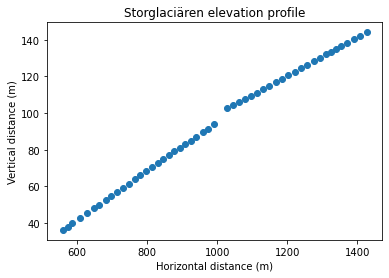

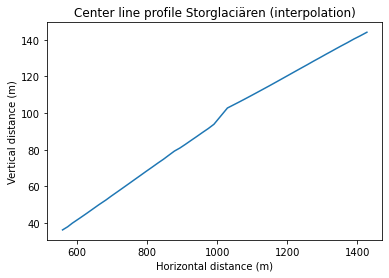

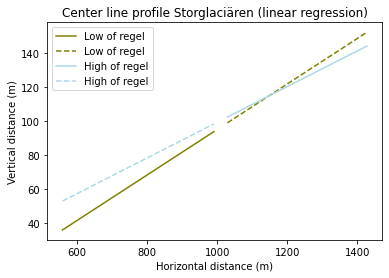

Correlation front regel: 0.999931. Correlation back regel: 0.999922.
Correlation all profile: 0.996385.


In [88]:
theodelite22 = get_data('theodelite.xlsx', [0, 9, 29, 31])
scatter_plot(theodelite22, 'Storglaciären elevation profile')
interpolation_plot(theodelite22, 'Center line profile Storglaciären (interpolation)')
corrs = linreg_plot_and_corr(theodelite22, 'Linear correlation 2022')